In [1]:
import pandas as pd
import numpy as np

# load the data
data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/"
    "arrhythmia/arrhythmia.data",
    header=None,
    sep=",",
    engine="python",
)

print("Data shape: ", data.shape)
display(data.describe())

Data shape:  (452, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [2]:
data["arrhythmia"] = data[len(data.columns) - 1].map(
    lambda x: 0 if x == 1 else 1
)
data = data.drop(len(data.columns) - 2, axis=1)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

numeric_data = data._get_numeric_data()
print("Data shape: ", numeric_data.shape)

X = numeric_data.iloc[
    :, :-1
].to_numpy()  # The first to second-last columns are the features
y = numeric_data.iloc[
    :, -1
].to_numpy()  # The last column is the ground-truth label
print("X shape: ", X.shape)

# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20181004
)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Data shape:  (452, 275)
X shape:  (452, 274)
X_train shape:  (361, 274)
X_test shape:  (91, 274)
y_train shape:  (361,)
y_test shape:  (91,)


In [4]:
class LogisticRegression(object):
    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w_ = rgen.randn(1 + X.shape[1]) * np.sqrt(
            2.0 / (1 + X.shape[1])
        )  # He initialization
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        # TODO
        eps = np.finfo(float).eps
        loss = np.mean(
            -y * np.log(output + eps) - (1 - y) * np.log(1 - output + eps)
        )
        return loss

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = y - output
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        eps = np.finfo(float).eps
        z_max = np.max(z)
        return np.exp(z - z_max) / (np.exp(z - z_max) + np.exp(-z_max) + eps)

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        X = self.net_input(X)
        X = self.activation(X)
        return np.where(X >= 0.5, 1, 0)

CV accuracy: 0.742 +/- 0.025
Test accuracy: 0.769


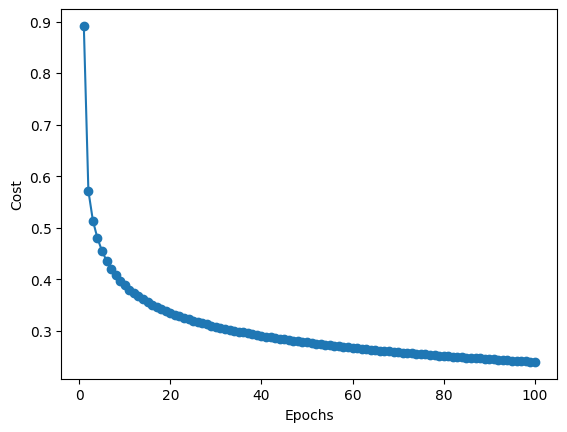

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

params = {"eta": 0.001, "n_epoch": 100, "random_state": 1}

# 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, test_idx in kfold.split(X_train_std, y_train):
    model = LogisticRegression(**params)
    X_train_fold = X_train_std[train_idx]
    y_train_fold = y_train[train_idx]
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_train_std[test_idx])
    score = accuracy_score(y_train[test_idx], y_pred)
    scores.append(score)
print("CV accuracy: %.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

model = LogisticRegression(**params)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
test_score = accuracy_score(y_test, y_pred)
print("Test accuracy: %.3f" % test_score)

cost = model.cost_
plt.plot(range(1, len(cost) + 1), cost, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

```
params = {"eta": 0.001, "n_epoch": 100, "random_state": 1}
```

```
CV accuracy: 0.748 +/- 0.028
Test accuracy: 0.769
```

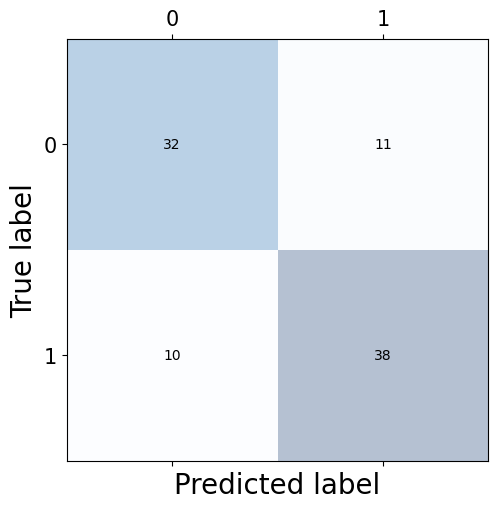

Precision: 0.776, Recall: 0.792, F1: 0.784


In [6]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
import matplotlib.pyplot as plt


def plot_confmat(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    for item in (
        [ax.title, ax.xaxis.label, ax.yaxis.label]
        + ax.get_xticklabels()
        + ax.get_yticklabels()
    ):
        item.set_fontsize(20)
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(15)
    # plt.savefig('./output/fig-logistic-regression-confusion-3.png', dpi=300)
    plt.show()


confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confmat(confmat)

precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print("Precision: %.3f, Recall: %.3f, F1: %.3f" % (precision, recall, f1))